## PYCON Tutorial

딥러닝과 음악이 만난다면 어떤 Task를 처리할 수 있을까요? 
Speech나 Audio 데이터와는 또 다른 매력을 가지고 있는 음악!
과연 음악데이터는 어떤 특징을 가지고 있고 이를 이용해서 우리는 또 어떤 멋진 문제를 해결할 수 있을까요??

먼저 우리가 Music Data로 부터 어떤 정보를 얻을 수 있는지 알아보고
과연 학계에서는 어떤 Task를 풀고 있는지를 확인해보려고합니다.
마지막으로는 Pytorch를 이용하여 아주 간단한 아키텍쳐를 구현해 보고자합니다!

Python, Pytorch, 그리고 Librosa 함께 우리 음악 데이터를 분석해 봅시다!

### Contents
- (2:00~3:00) Sound Data의 이해와 전처리와 시각화
- (3:00~3:30) Music-Deep Learing 의 주요 Task Review
- (3:30~3:40) Break
- (3:40~5:00) Music Gerne Classification, Music Generation (Optional)

### 이 튜토리얼을 듣고 여러분이 얻어갈 것
- Speech에서도 응용할만한 Sound Data에 대한 기초 이해
- 리뷰 논문을 읽고온 대학원생의 리뷰 논문 리뷰
- 음악 딥러닝 논문 구현에서 쉽게 경험하는 실수
- 실험하기 좋은 아키텍쳐에 대한 대학원생의 고민

### Requirements
- 기본적인 파이썬 프로그래밍
- Python 3.7 (recommended), 3.6 (Good)
- Numpy
- Librosa
- PyTorch 1.0
- 데이터셋을 받을 1GB 이상의 여유공간이 있는 노트북


### Contents 

- 소리란 무엇인가?
- 

## 1. Digital Signal Processing

저희의 목적은 소리 signal를 어떠한 데이터 타입으로 표현하며, 소리와 관련된 task를 해결하는데 있습니다. 그렇다면 소리는 어떠한 데이터를 가지고 있을까요?

### Sound?

소리는 일반적으로 진동으로 인한 공기의 압축으로 생성됩니다. 그렇다면 압축이 얼마나 됬느냐에 따라서 표현되것이 바로 Wave(파동)인데요. 파동은 진동하며 공간/매질을 전파해 나가는 현상입니다. 질량의 이동은 없지만 에너지/운동량의 운반은 존재합니다.

Wave에서 저희가 얻을수 있는 정보는 크게 3가지가 있습니다.
- Phase(Degress of displacement) : 위상
- Frequency : 주파수
- Amplitude(Intensity) : 진폭

<img src='./img/air.png' width=50%>

### Sampling

샘플링은 무엇일까요?? 아날로그 정보를 잘게 쪼개서 discrete한 디지털 정보로 표현해야합니다. 우리는 무한하게 쪼개서 저장할수 없으니, 어떤 기준을 가지고 아날로그 정보를 쪼개서 대표값을 취하게 됩니다.

### 1.1. Time domain

시간을 기준으로 아날로그 시그널을 쪼개게 되는 것을 의미합니다. Sampling을 통하여 컴퓨터는 소리 sequence를 binary value로 받아드리게 됩니다.

__Sampling rate : 얼마나 잘게 쪼갤 것인가?__<br>
잘개 쪼갤수록 원본 데이터와 거이 가까워지기 떄문에 좋지만 Data의 양이 증가하게 됩니다. 만약 너무 크게 쪼개게 된다면, 원본 데이터로 reconstruct하기 힘들어 질 것입니다.

<img src='./img/SampleRate.png' width=70%>

### 1.2. Quantization

시간의 기준이 아닌 실제 amplitude의 real valued 를 기준으로 시그널의 값을 조절합니다. Amplitude를 이산적인 구간으로 나누고, signal 데이터의 Amplitude를 반올림하게 됩니다.

그렇다면 이산적인 구간은 어떻게 나눌수 있을까요?, bit의 비트에 의해서 결정됩니다. 
- B bit의 Quantization : $-2^{B-1}$ ~ $2^{B-1}-1$
- Audio CD의 Quantization (16 bits) : $-2^{15}$ ~ $2^{15}-1$
- 위 값들은 보통 -1.0 ~ 1.0  영역으로 scaling되기도 합니다.

<img src='./img/Quantization.png' width=70%>

### Python tutorial

파일을 업로드 해봅시다.

scipy.io의 librosa.load 함수의 경우, 파일이름을 인자로 받아서 sample rate와 data를 return 해줍니다. 이때의 데이터 타입은 float 32이며 sampling rate의 디폴트 값은 22050입니다.

- 24-bit 데이터인 wav파일은 읽지 못합니다.
- 32-bit floating-point 나 32-bit PCM 이 권장됩니다.
    - PCM(Pulse code modulation) : 아날로그인 소리신호를 디지털로 표현하기 위한 것입니다.

In [112]:
import librosa

train_audio_path = 'input/'
file_path = 'pop.wav'
y, sr = librosa.load(str(train_audio_path)+file_path)

In [113]:
y, sr

(array([-0.0249939 , -0.01815796, -0.02023315, ..., -0.36505127,
        -0.4237976 , -0.42385864], dtype=float32), 22050)

In [114]:
y[0:50]

array([-0.0249939 , -0.01815796, -0.02023315,  0.00231934,  0.01629639,
        0.0272522 ,  0.02905273,  0.02883911,  0.02658081,  0.01513672,
        0.01248169,  0.00457764,  0.00747681, -0.02450562, -0.01156616,
       -0.00671387,  0.03466797,  0.05603027,  0.07266235,  0.0456543 ,
        0.04602051,  0.02441406,  0.02130127,  0.00506592,  0.01760864,
        0.01400757,  0.03741455,  0.0302124 ,  0.01568604, -0.00842285,
       -0.02560425, -0.03390503, -0.03591919, -0.03182983, -0.043396  ,
       -0.04525757, -0.04788208, -0.03591919, -0.019104  ,  0.00186157,
        0.00299072, -0.00845337, -0.01919556, -0.00341797, -0.01327515,
        0.05044556,  0.0088501 ,  0.06988525,  0.04721069,  0.08602905],
      dtype=float32)

In [115]:
# 30 * 22050
len(y)

661504

In [116]:
import IPython.display as ipd
ipd.Audio(y, rate=sr)

In [117]:
y, sr = librosa.load(str(train_audio_path)+file_path,offset=15.0, duration=5.0)

In [118]:
# 15초부터 5초만 듣고 싶다
y, len(y)

(array([-0.00473022, -0.10464478, -0.1072998 , ..., -0.06787109,
        -0.06124878, -0.05862427], dtype=float32), 110250)

위 데이터를 jupyter notebook 환경에서 재생시킬수도 있습니다.

In [119]:
import IPython.display as ipd
ipd.Audio(y, rate=sr)

## 2. Sound Representation

위에서 Sampling된 discrete한 데이터를 이제 우리는 표현이 가능합니다. 그렇다면 어떤 요소를 기반으로 저희가 데이터를 표현해야할까요?, 첫번째는 시간의 흐름에 따라, 공기의 파동의 크기로 보는 Time-domain Representation 방법이 있습니다. 두번째는 시간에 따라서 frequency의 변화를 보는 Time-Frequency representation이 있습니다. 

### 2.1. Time domain - Waveform

Waveform의 경우에는 오디오의 자연적이 표현입니다. 시간이 x축으로 그리고 amplitude가 y축으로 표현이 됩니다.

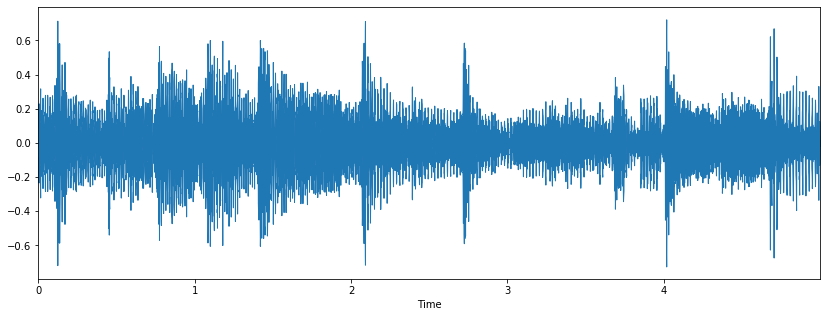

In [120]:
import matplotlib.pyplot as plt
import librosa.display
%matplotlib inline

fig = plt.figure(figsize = (14,5))
librosa.display.waveplot(y, sr=sr)

### 2.2. 정현파 모델링 

In [121]:
A = 0.9
f = 440
phi = np.pi/2
fs = 22050
t = 1

In [122]:
def genSine(A, f, phi, fs, t):
    """
    Inputs:
        A (float) =  amplitude of the sinusoid
        f (float) = frequency of the sinusoid in Hz
        phi (float) = initial phase of the sinusoid in radians
        fs (float) = sampling frequency of the sinusoid in Hz
        t (float) =  duration of the sinusoid (is second)
    """
    t = np.arange(0, t, 1.0/fs)
    x = A * np.cos(2 * np.pi * f * t + phi)
    return x

In [123]:
A440 = genSine(A, f, phi, fs, t)
A440, len(A440)

(array([ 5.51091060e-17, -1.12545471e-01, -2.23324063e-01, ...,
         3.30596635e-01,  2.23324063e-01,  1.12545471e-01]), 22050)

In [124]:
import IPython.display as ipd
ipd.Audio(A440, rate=len(A440))

### 2.3. DFT low code

In [125]:
def DFT(x):
    N = len(x)
    X = np.array([])
    nv = np.arange(N)
    
    for k in range(N):
        s = np.exp(1j*2*np.pi*k/N*nv)
        X = np.append(X, sum(x*np.conjugate(s)))
    return X

In [126]:
A440[0:10]

array([ 5.51091060e-17, -1.12545471e-01, -2.23324063e-01, -3.30596635e-01,
       -4.32679087e-01, -5.27968802e-01, -6.14969803e-01, -6.92316239e-01,
       -7.58793829e-01, -8.13358925e-01])

In [127]:
dft = DFT(A440[0:10])
dft

array([-4.50655285+0.00000000e+00j,  0.63906851-1.37235340e+00j,
        0.48427366-5.95272212e-01j,  0.45734385-3.12527295e-01j,
        0.44908077-1.39533795e-01j,  0.44701929+4.86563129e-16j,
        0.44908077+1.39533795e-01j,  0.45734385+3.12527295e-01j,
        0.48427366+5.95272212e-01j,  0.63906851+1.37235340e+00j])

### 2.4. STFT (Short-Time Fourier Transform)

FFT는 시간에 흐름에 따라 신호의 수파수가 변했을때, 어느 시간대에 주파수가 변하는지 모르게 됩니다. 이러한 한계를 극복하기 위해서, STFT는 시간의 길이를 나눠서 이제 퓨리에 변환을 하게 됩니다. 즉 FFT를 했을때는 Time domina에 대한 정보가 날아가게 되는 것이죠.

주파수의 특성이 시간에 따라 달라지는 사운드를 분석하는 방법입니다. 일반적으로 우리가 사용하는 signal 데이터에 적합하다. 시계열 데이터를 일정한 시간 구간 (window size)로 나누고, 각 구간에 대해서 스펙트럼을 구하는 데이터이다. 이는 Time-frequency 2차원 데이터로 표현이 됩니다.

$$
X(l,k) = \sum_{n=0}^{N-1} w(n) x(n+lH)\exp^{\frac{-2\pi k n}{N}}
$$

- $N$ : FFT size
    - Window를 얼마나 많은 주파수 밴드로 나누는가 입니다.

- Duration
    - 샘플링 레이트를 window로 나눈 값입니다.
    - $T= window/SR$
    - 440Hz 신호의 window size는 5*(1/440)이 됩니다.

- $w(n)$ : Window function
    - 일반적으로 Hann window가 쓰입니다.

- $n$ : Window size
    - Window 함수에 들어가는 Sample의 양입니다.
    - 작을수록 Low-frequency resolution을 가지게 되고, high-time resolution을 가집니다.
    - 길수록 High-frequency, low time resolution을 가집니다.
    
- $H$ : Hop size
    - 윈도우가 겹치는 사이즈입니다. 일반적으로는 1/4정도를 겹치게 합니다.

STFT의 결과는 즉 시간의 흐름(Window)에 따른 Frequency영역별 Amplitude를 반환합니다.

In [128]:
# STFT
S = librosa.core.stft(y, n_fft=1024, hop_length=512, win_length=1024)
S.shape, len(S[0]), S[0][0]

((513, 216), 216, (-9.718022+0j))

In [129]:
len(y)/512

215.33203125

In [130]:
def frame_audio(audio, FFT_size=1024, hop_size=512, sample_rate = 22050):
    audio = np.pad(audio, int(FFT_size/2), mode='reflect')
    frame_len = np.round(sample_rate*hop_size / 1000).astype(int)
    frame_num = int((len(audio) - FFT_size) / frame_len) + 1
    frames = np.zeros((frame_num, FFT_size))
    
    for n in range(frame_num):
        frames[n] = audio[n*frame_len:n*frame_len+FFT_size]
    return frames

In [131]:
audio_framed = frame_audio(y)
print("Framed audio shape: {}".format(audio_framed.shape))

Framed audio shape: (10, 1024)


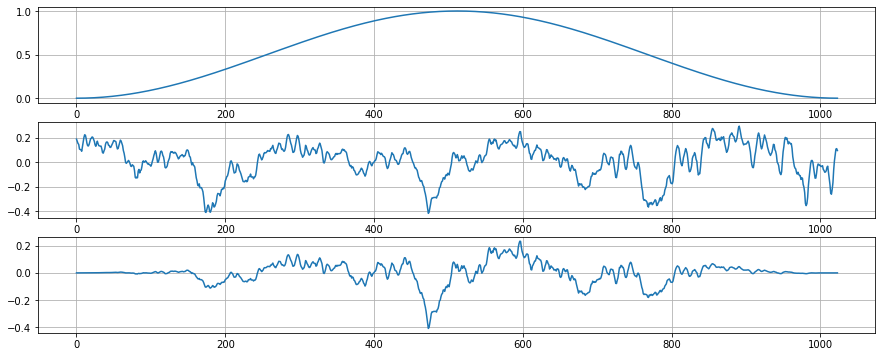

In [132]:
from scipy import signal

window = signal.get_window("hann", 1024, fftbins=True)
audio_win = audio_framed * window
ind = 2
plt.figure(figsize=(15,6))
plt.subplot(3,1,1)
plt.plot(window)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(audio_framed[ind])
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(audio_win[ind])
plt.grid(True)
plt.show()

### Mel Scale
멜 스펙트럼은 주파수 단위를 다음 공식에 따라 멜 단위로 바꾼 것을 의미합니다.
<img src='./img/melbank.png' width=70%>

$$
m = 2595 \log_{10}\left(1 + \frac{f}{700}\right)
$$
일반적으로는 mel-scaled bin을 FFT size보다 조금더 작게 만드는게 일반적입니다.

In [133]:
# phase 에 대한 정보를 날린다.
D = np.abs(S)**2

In [134]:
# mel spectrogram (512 --> 40)
mel_basis = librosa.filters.mel(sr, 1024, n_mels=128)
mel_S = np.dot(mel_basis, D)
mel_S.shape

(128, 216)

In [137]:
#log compression
log_mel_S = librosa.power_to_db(mel_S)
log_mel_S

array([[ 10.50282  ,   3.3817787,   3.8148017, ...,   6.7353773,
          6.2147026,   4.409686 ],
       [  9.414548 ,  13.427411 ,  13.303345 , ...,  10.558743 ,
         10.267238 ,   8.808987 ],
       [ 13.44678  ,  14.028223 ,  13.638147 , ...,  10.807592 ,
         10.600666 ,  11.188966 ],
       ...,
       [-34.890446 , -37.66426  , -41.13568  , ..., -58.102524 ,
        -58.102524 , -58.102524 ],
       [-37.587162 , -43.431835 , -41.85066  , ..., -58.102524 ,
        -58.102524 , -58.102524 ],
       [-36.543713 , -47.144505 , -56.023193 , ..., -58.102524 ,
        -58.102524 , -58.102524 ]], dtype=float32)

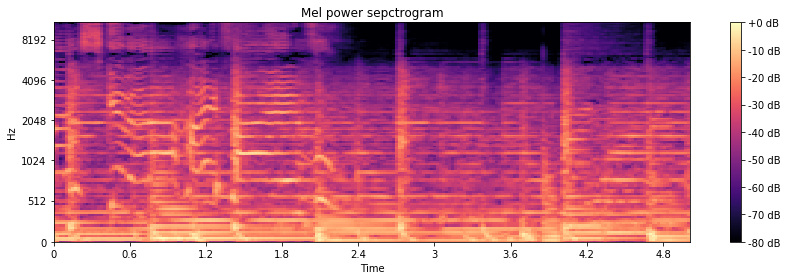

In [135]:
import librosa.display

S = librosa.feature.melspectrogram(y, sr=sr, n_mels = 128)
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

### MFCC

In [139]:
# mfcc (DCT)
mfcc = librosa.feature.mfcc(S=log_mel_S, n_mfcc=13)
mfcc = mfcc.astype(np.float32)    # to save the memory (64 to 32 bits)
mfcc.shape

(13, 216)

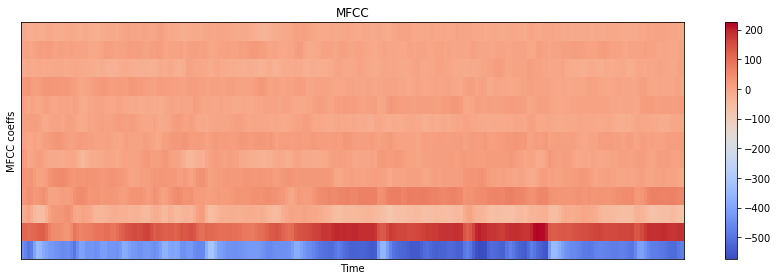

In [141]:
plt.figure(figsize=(12,4))
librosa.display.specshow(mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()